# Marketing Campaign - Grocery Consumer Analysis.

## <font color=#088A68>Dataset Features</font>

People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import pandas as pd
import numpy as np

###

import scipy.stats as stats
import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

###

from sklearn.cluster import KMeans

###

df = pd.read_csv("marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.shape

(2240, 29)

In [5]:
# drop null records
df.dropna(inplace=True)
df.shape

(2216, 29)

In [6]:
## Using the z-score method for outlier identification and removal 

## starting shape
print ("starting shape:", df.shape)

## calculate zscores
df["zscore_Income"] = np.abs(stats.zscore(df["Income"]))
df["zscore_Kidhome"] = np.abs(stats.zscore(df["Kidhome"]))
df["zscore_Teenhome"] = np.abs(stats.zscore(df["Teenhome"]))
df["zscore_Recency"] = np.abs(stats.zscore(df["Recency"]))
df["zscore_MntWines"] = np.abs(stats.zscore(df["MntWines"]))
df["zscore_MntFruits"] = np.abs(stats.zscore(df["MntFruits"]))
df["zscore_MntMeatProducts"] = np.abs(stats.zscore(df["MntMeatProducts"]))
df["zscore_MntFishProducts"] = np.abs(stats.zscore(df["MntFishProducts"]))
df["zscore_MntSweetProducts"] = np.abs(stats.zscore(df["MntSweetProducts"]))

###

## determine rows with outliers for income and drop
bwt_outliers = df[df["zscore_Income"] > 3].index
df = df.drop(bwt_outliers)

###

## determine rows with outliers for kid counts and drop
gest_outliers = df[df["zscore_Kidhome"] > 3].index
df = df.drop(gest_outliers)

###

## determine rows with outliers for teen counts and drop
age_outliers = df[df["zscore_Teenhome"] > 3].index
df = df.drop(age_outliers)

###

## determine rows with outliers for recency and drop
ht_outliers = df[df["zscore_Recency"] > 3].index
df = df.drop(ht_outliers)

###

## determine rows with outliers for wine bought and drop
wt_outliers = df[df["zscore_MntWines"] > 3].index
df = df.drop(wt_outliers)

###

## determine rows with outliers for fruit bought and drop
wt_outliers = df[df["zscore_MntFruits"] > 3].index
df = df.drop(wt_outliers)

###

wt_outliers = df[df["zscore_MntMeatProducts"] > 3].index
df = df.drop(wt_outliers)

###

## determine rows with outliers for finish product bought and drop
wt_outliers = df[df["zscore_MntFishProducts"] > 3].index
df = df.drop(wt_outliers)

###

## determine rows with outliers for sweet product bought and drop
wt_outliers = df[df["zscore_MntSweetProducts"] > 3].index
df = df.drop(wt_outliers)

## ending shape; dropping zscore columns
df.drop(columns=["zscore_Income", "zscore_Kidhome", "zscore_Teenhome", "zscore_Recency", "zscore_MntWines", "zscore_MntFruits", "zscore_MntMeatProducts", "zscore_MntFishProducts", "zscore_MntSweetProducts"], inplace=True)


print ("shape after outliers removed:", df.shape)

starting shape: (2216, 29)
shape after outliers removed: (2017, 29)


## 1. Analyze and Predict the Probability of Customer Complain with Logistic Regression method.

#### In the last 2 years, some customers complained about products that they bought. On the other hand, some never made a complain. We're going to use Logistic Regression to analyze and predict which customer would make a complain based on their backgrounds.

In [7]:
df["Kidhome"].value_counts()

0    1095
1     876
2      46
Name: Kidhome, dtype: int64

### <font color=#088A68>Relationship between Dependent and Independent Variables</font>
***

Complain
0    1968.790581
1    1965.095238
Name: Year_Birth, dtype: float64


<AxesSubplot:xlabel='Complain', ylabel='Year_Birth'>

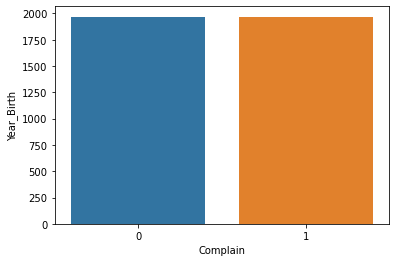

In [8]:
print(df["Year_Birth"].groupby(df["Complain"]).mean())

###

sns.barplot(data = df, x = "Complain", y = "Year_Birth", ci = None)

Complain
0    49343.972445
1    45242.285714
Name: Income, dtype: float64


<AxesSubplot:xlabel='Complain', ylabel='Income'>

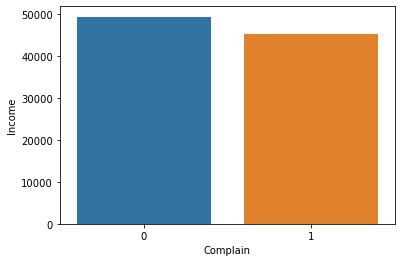

In [9]:
print(df["Income"].groupby(df["Complain"]).mean())

###

sns.barplot(data = df, x = "Complain", y = "Income", ci = None)

Complain
0    0.477956
1    0.666667
Name: Kidhome, dtype: float64


<AxesSubplot:xlabel='Complain', ylabel='Kidhome'>

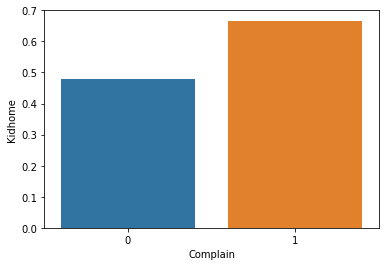

In [10]:
print(df["Kidhome"].groupby(df["Complain"]).mean())

###

sns.barplot(data = df, x = "Complain", y = "Kidhome", ci = None)

Complain
0    0.534569
1    0.523810
Name: Teenhome, dtype: float64


<AxesSubplot:xlabel='Complain', ylabel='Teenhome'>

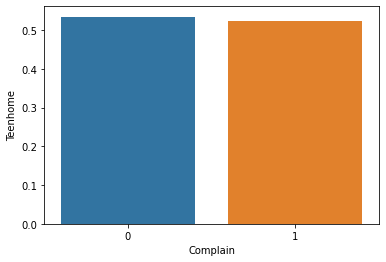

In [11]:
print(df["Teenhome"].groupby(df["Complain"]).mean())

###

sns.barplot(data = df, x = "Complain", y = "Teenhome", ci = None)

Complain
0    49.002004
1    53.047619
Name: Recency, dtype: float64


<AxesSubplot:xlabel='Complain', ylabel='Recency'>

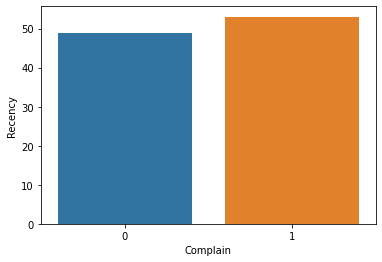

In [12]:
print(df["Recency"].groupby(df["Complain"]).mean())

###

sns.barplot(data = df, x = "Complain", y = "Recency", ci = None)

Text(0.5, 1.0, 'Complain by Education')

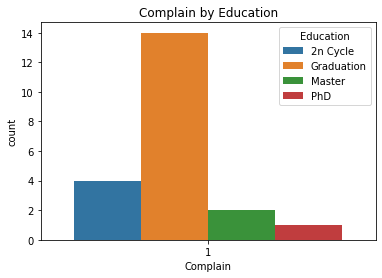

In [13]:
# Percentage of people complain group by education.
df1 = df[df['Complain'] == 1]

pd.crosstab(
    df1['Complain'], 
    df['Education'], 
    normalize = True
).style.format('{:.2%}')

###
sns.countplot(data = df1, x = "Complain", hue = "Education")
plt.title("Complain by Education")

Text(0.5, 1.0, 'Complain by Marital_Status')

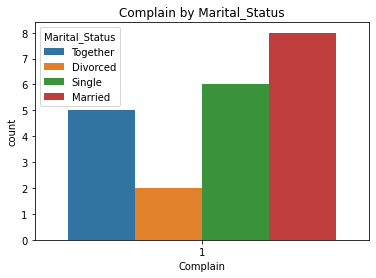

In [14]:
# Percentage of people complain group by Marital_Status.
df1 = df[df['Complain'] == 1]

pd.crosstab(
    df1['Complain'], 
    df['Marital_Status'], 
    normalize = True
).style.format('{:.2%}')

###
sns.countplot(data = df1, x = "Complain", hue = "Marital_Status")
plt.title("Complain by Marital_Status")

### <font color=#088A68>Preparing the Logistic Regression Model</font>
***
Creating a logistic regression model and fitting your data is very similar to creating a linear regression model. Before this point, make sure you have a strong understanding of which variables you want to include, what your dependent variable is, and how your dependent variable is coded.

0    1996
1      21
Name: Complain, dtype: int64


<AxesSubplot:xlabel='Complain', ylabel='count'>

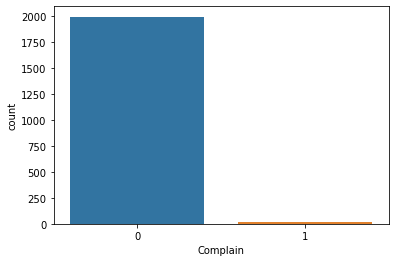

In [15]:
## check the coding of the dependent variable
## the value coded as "1" should represent to the presence of the event

###

print(df["Complain"].value_counts())

###

sns.countplot(data = df, x = "Complain")

### <font color=#088A68>The Logistic Regression Model</font>
***
Logistic regression is a statistical method for predicting a categorical outcome. The outcome or target variable is binary meaning there are only two options. It calculates the probability of an event occurrence.

In [16]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('Complain ~  Year_Birth + Income + Kidhome + Teenhome + Recency + C(Education) + C(Marital_Status)', data=df).fit()

mod1.summary()

         Current function value: 0.053117
         Iterations: 35


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Complain   No. Observations:                 2017
Model:                          Logit   Df Residuals:                     2000
Method:                           MLE   Df Model:                           16
Date:                Wed, 04 May 2022   Pseudo R-squ.:                 0.08235
Time:                        22:51:02   Log-Likelihood:                -107.14
converged:                      False   LL-Null:                       -116.75
Covariance Type:            nonrobust   LLR p-value:                    0.2570
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        66.4156   5295.127      0.013      0.990   -1.03e+04    1.04e+04
C(Education)[T.Basic]           -17.2159   5018.699     -0.003      0.997   -9853.685    9819.253
C(Education)[T.Graduation]       -0.4301      0.593     -0.726      0.468      -1.591       0.731
C(Education)[T.Master]           -1.4157      0.886     -1.597      0.110      -3.153       0.321
C(Education)[T.PhD]              -2.3898      1.135     -2.105      0.035      -4.615      -0.164
C(Marital_Status)[T.Alone]       -5.6306   4.79e+04     -0.000      1.000   -9.39e+04    9.39e+04
C(Marital_Status)[T.Divorced]    11.6345   5295.029      0.002      0.998   -1.04e+04    1.04e+04
C(Marital_Status)[T.Married]     12.0177   5295.029      0.002      0.998   -1.04e+04    1.04e+04
C(Marital_Status)[T.Single]      12.3591   5295.029      0.002      0.998   -1.04e+04    1.04e+04
C(Marital_Status)[T.Together]    11.8545   5295.029      0.002      0.998   -1.04e+04    1.04e+04
C(Marital_Status)[T.Widow]      -10.5686   9.34e+04     -0.000      1.000   -1.83e+05    1.83e+05
C(Marital_Status)[T.YOLO]        -5.3715   1.44e+05  -3.72e-05      1.000   -2.83e+05    2.83e+05
Year_Birth                       -0.0419      0.016     -2.562      0.010      -0.074      -0.010
Income                        -4.544e-06   1.36e-05     -0.335      0.738   -3.12e-05    2.21e-05
Kidhome                           0.7105      0.446      1.595      0.111      -0.163       1.584
Teenhome                         -0.1972      0.439     -0.449      0.654      -1.058       0.664
Recency                           0.0037      0.008      0.490      0.624      -0.011       0.019
=================================================================================================
"""

### <font color=#088A68>Logistic Regression Model Results</font>

In [17]:
## print just the variable coefficient values

mod1.params

Intercept                        66.415648
C(Education)[T.Basic]           -17.215939
C(Education)[T.Graduation]       -0.430054
C(Education)[T.Master]           -1.415690
C(Education)[T.PhD]              -2.389763
C(Marital_Status)[T.Alone]       -5.630565
C(Marital_Status)[T.Divorced]    11.634510
C(Marital_Status)[T.Married]     12.017710
C(Marital_Status)[T.Single]      12.359122
C(Marital_Status)[T.Together]    11.854534
C(Marital_Status)[T.Widow]      -10.568614
C(Marital_Status)[T.YOLO]        -5.371519
Year_Birth                       -0.041916
Income                           -0.000005
Kidhome                           0.710472
Teenhome                         -0.197163
Recency                           0.003730
dtype: float64

### <font color=#DF7401>Odds Ratio (OR)</font>

In [18]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,6.981512e+28,0.989993,Not Sig
C(Education)[T.Basic],3.335898e-08,0.997263,Not Sig
C(Education)[T.Graduation],6.504742e-01,0.467954,Not Sig
C(Education)[T.Master],2.427581e-01,0.110183,Not Sig
C(Education)[T.PhD],9.165144e-02,0.035313,Sig
C(Marital_Status)[T.Alone],3.586550e-03,0.999906,Not Sig
C(Marital_Status)[T.Divorced],1.129285e+05,0.998247,Not Sig
C(Marital_Status)[T.Married],1.656629e+05,0.998189,Not Sig
C(Marital_Status)[T.Single],2.330766e+05,0.998138,Not Sig
C(Marital_Status)[T.Together],1.407210e+05,0.998214,Not Sig


### <font color=#DF7401>Percent Change (PP)</font>

In [19]:
## percent change = OR minus 1 multiplied by 100

df_odds["Pct Change"] = (df_odds["OR"] - 1) * 100

df_odds

,OR,pvalue,Sig,Pct Change
Intercept,6.981512e+28,0.989993,Not Sig,6.981512e+30
C(Education)[T.Basic],3.335898e-08,0.997263,Not Sig,-1.000000e+02
C(Education)[T.Graduation],6.504742e-01,0.467954,Not Sig,-3.495258e+01
C(Education)[T.Master],2.427581e-01,0.110183,Not Sig,-7.572419e+01
C(Education)[T.PhD],9.165144e-02,0.035313,Sig,-9.083486e+01
C(Marital_Status)[T.Alone],3.586550e-03,0.999906,Not Sig,-9.964134e+01
C(Marital_Status)[T.Divorced],1.129285e+05,0.998247,Not Sig,1.129275e+07
C(Marital_Status)[T.Married],1.656629e+05,0.998189,Not Sig,1.656619e+07
C(Marital_Status)[T.Single],2.330766e+05,0.998138,Not Sig,2.330756e+07
C(Marital_Status)[T.Together],1.407210e+05,0.998214,Not Sig,1.407200e+07


### <font color=#088A68>Logistic Regression Model Predictions</font>

### Scenario 1

    * Customer who was born in 1964, graduation degree, married, earning 200K/year, having 8 kid with 3 of them are teenagers. Number of days since customer's last purchase is 40. 

In [102]:
mod1.predict({
    'Year_Birth': 1964, 
    'Education': "Graduation", 
    'Marital_Status': "Married", 
    'Income': 200000, 
    'Kidhome': 8, 
    'Teenhome': 0, 
    'Recency': 40})

## the probability of being classified as compalain is 66%. 
## if probability is greater than 50% > we classify this individual as having the outcome

0    0.646474
dtype: float64

### Scenario 2

    * 65 year old person, Graduation degree, single, earning 65K/year, having 3 kid with 0 of them are teenagers. Number of days since customer's last purchase is 14 days. 

In [21]:
mod1.predict({
    'Year_Birth': 1957, 
    'Education': "Graduation", 
    'Marital_Status': "Single", 
    'Income': 65000, 
    'Kidhome': 3, 
    'Teenhome': 0, 
    'Recency': 20})

## the probability of being classified as complain is 14%. 
## if probability is greater than 50% > we classify this individual as having the outcome

0    0.144909
dtype: float64

## 2. Analyze and Predict Customer's Number of Purchases with K-Means Clustering method.

#### Using K-means clustering to examine the relationship between customer's year-birth, income, numbers of kids and total number of purchases they had made in the last 2 years.  From there, we can conclude which group of customers make more frequent purchases.

### <font color=#088A68>Market Basket Analysis</font>
***

In [22]:
df["NumPurchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

In [23]:
# check and remove outliner of NumPurchases column
print ("starting shape:", df.shape)

df["zscore_NumPurchases"] = np.abs(stats.zscore(df["NumPurchases"]))
## determine rows with outliers for NumPurchases and drop
bwt_outliers = df[df["zscore_NumPurchases"] > 3].index
df = df.drop(bwt_outliers)
## ending shape; dropping zscore columns
df.drop(columns=["zscore_NumPurchases"], inplace=True)

print ("shape after outliers removed:", df.shape)

starting shape: (2017, 30)
shape after outliers removed: (2017, 30)


In [24]:
dfk = df[['Year_Birth','Income','Kidhome','Recency','NumPurchases']]
dfk.head()

,Year_Birth,Income,Kidhome,Recency,NumPurchases
0,1957,58138.0,0,58,22
1,1954,46344.0,1,38,4
2,1965,71613.0,0,26,20
3,1984,26646.0,1,26,6
4,1981,58293.0,1,94,14


### <font color=#088A68>Statistical Analysis</font>
***

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year_Birth', ylabel='Density'>

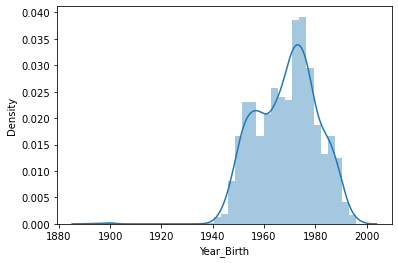

In [25]:
# distribution of customer age
sns.distplot(dfk['Year_Birth'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

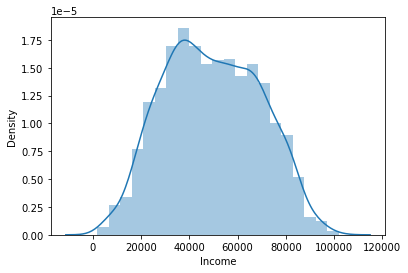

In [26]:
# distribution of customer age
sns.distplot(dfk['Income'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumPurchases', ylabel='Density'>

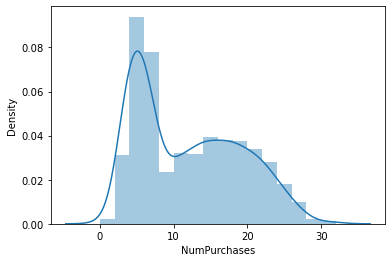

In [27]:
# distribution of customer age
sns.distplot(dfk['NumPurchases'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

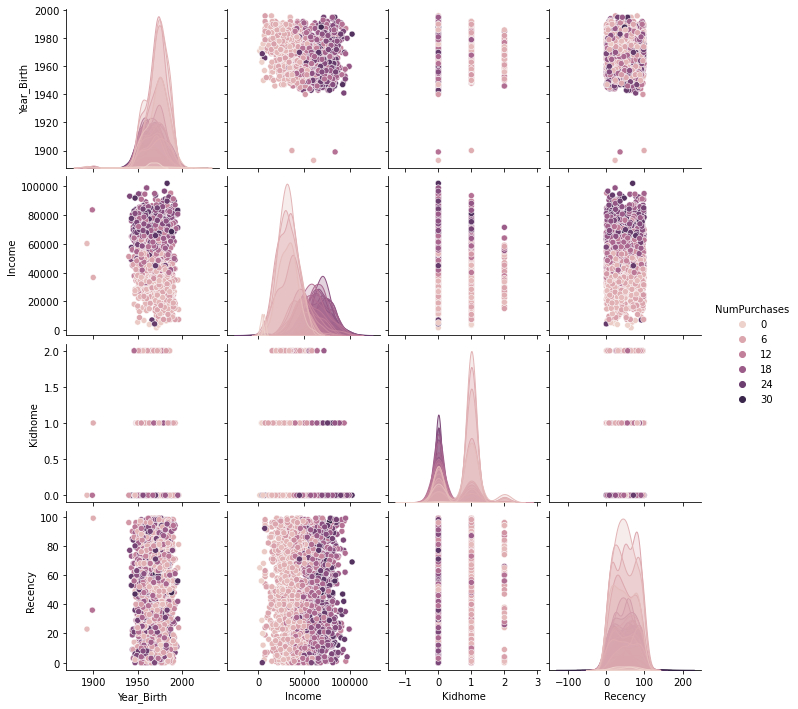

In [28]:
# compare all numerical features by income group
sns.pairplot(data=dfk, hue="NumPurchases")

### <font color=#088A68>K-Means Model</font>
***

In [29]:
# dataframe that will be used in algorithm
X = dfk[['NumPurchases', 'Income', 'Year_Birth']]
X.head()

,NumPurchases,Income,Year_Birth
0,22,58138.0,1957
1,4,46344.0,1954
2,20,71613.0,1965
3,6,26646.0,1984
4,14,58293.0,1981


In [30]:
# initialize KMeans to create 5 clusters
kmeans = KMeans(n_clusters=6)

In [31]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(X)

KMeans(n_clusters=6)

In [32]:
len(df)

2017

In [33]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(0=Age, 1=Income, 2=Score)
kmeans.cluster_centers_

array([[5.56250000e+00, 3.09179918e+04, 1.97264674e+03],
       [1.98244898e+01, 8.16040122e+04, 1.96640816e+03],
       [1.41355499e+01, 5.43602276e+04, 1.96493606e+03],
       [5.12831858e+00, 1.79748230e+04, 1.97585841e+03],
       [8.20646766e+00, 4.20355871e+04, 1.96882090e+03],
       [1.85766234e+01, 6.71542545e+04, 1.96615325e+03]])

In [34]:
# create column in original dataframe with cluster group number
dfk['cluster'] = kmeans.labels_
dfk.head()

<ipython-input-34-29d10cd31f46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfk['cluster'] = kmeans.labels_


,Year_Birth,Income,Kidhome,Recency,NumPurchases,cluster
0,1957,58138.0,0,58,22,2
1,1954,46344.0,1,38,4,4
2,1965,71613.0,0,26,20,5
3,1984,26646.0,1,26,6,0
4,1981,58293.0,1,94,14,2


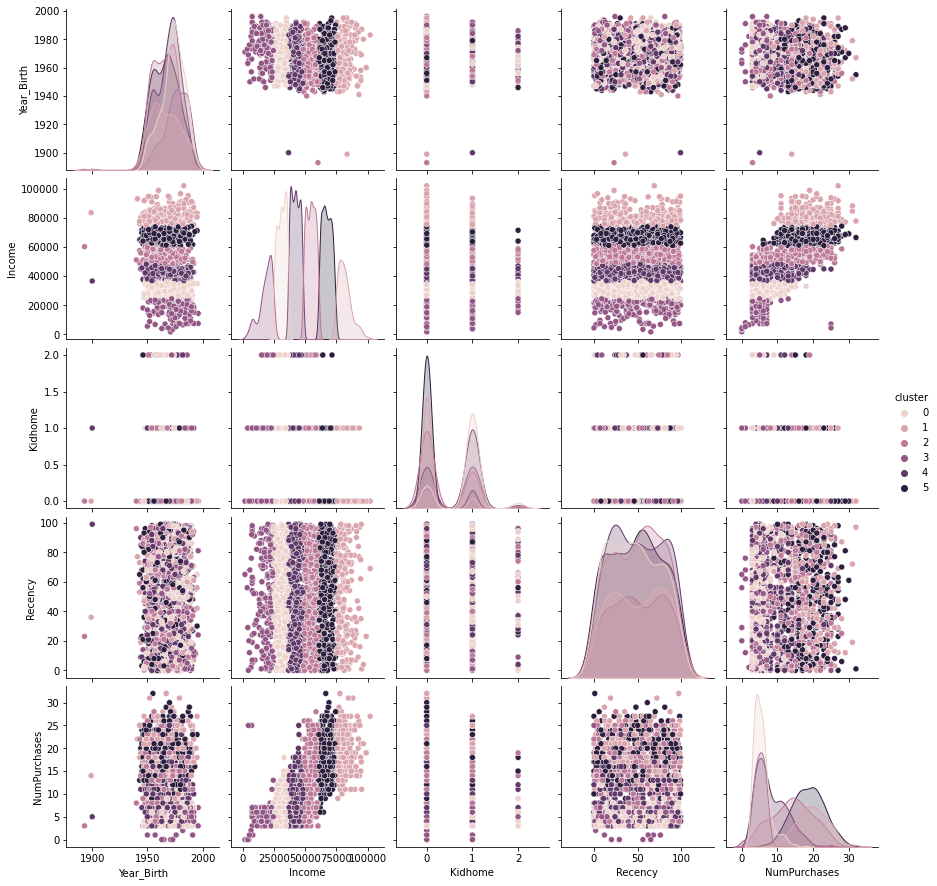

In [35]:
# compare all numerical features by cluster group
sns.pairplot(data=dfk, hue='cluster')

### <font color=#088A68>Cluster Analysis</font>
***

The plot comparing `Income` and `NumPurchases` has the most distinction with the clusters, so let's explore the locations of the centroids. Then we will analyze the cluster groups to determine the characteristics of the customer segments.

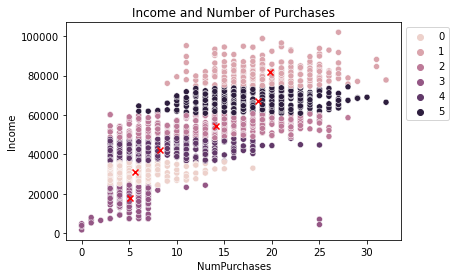

In [36]:
# compare "Income" and "Score"
sns.scatterplot(data=dfk, x='NumPurchases', y='Income', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title("Income and Number of Purchases")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [42]:
# select a cluster from dataframe
cluster = dfk.loc[dfk['cluster'] == 0]
cluster.head()

,Year_Birth,Income,Kidhome,Recency,NumPurchases,cluster
3,1984,26646.0,1,26,6,0
7,1985,33454.0,1,32,8,0
8,1974,30351.0,1,19,5,0
19,1985,33812.0,1,86,6,0
52,1977,35790.0,1,54,5,0


In [43]:
# number of customers in this cluster
len(cluster)

367

In [44]:
# descriptive statistics for this cluster
cluster.describe()

,Year_Birth,Income,Kidhome,Recency,NumPurchases,cluster
count,367.000000,367.00000,367.000000,367.000000,367.000000,367.0
mean,1972.599455,30968.47139,0.861035,46.509537,5.547684,0.0
std,10.522954,3448.30598,0.461385,28.396765,2.366037,0.0
min,1947.000000,24480.00000,0.000000,0.000000,3.000000,0.0
25%,1966.500000,28071.50000,1.000000,22.000000,4.000000,0.0
50%,1973.000000,31086.00000,1.000000,46.000000,5.000000,0.0
75%,1980.000000,34034.50000,1.000000,71.000000,6.000000,0.0
max,1995.000000,36443.00000,2.000000,99.000000,18.000000,0.0


### <font color=#088A68>Analyze income range of clusters</font>


In [103]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(dfk['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Income Ranges\n")
for cluster_num in sorted_clusters:
    small_dfk = dfk.loc[dfk['cluster'] == cluster_num]
    min_income = small_dfk['NumPurchases'].min()
    max_income = small_dfk['NumPurchases'].max()
    avg_score = small_dfk['Income'].mean()
    avg_income = small_dfk['NumPurchases'].mean()
    
    print(f"Cluster {cluster_num}: {int(avg_income):,}, avg Income: ${int(avg_score):,}")

Cluster Income Ranges

Cluster 0: 5, avg Income: $30,968
Cluster 1: 19, avg Income: $81,604
Cluster 2: 14, avg Income: $54,424
Cluster 3: 5, avg Income: $18,031
Cluster 4: 8, avg Income: $42,110
Cluster 5: 18, avg Income: $67,154


### Customer Segments

After analyzing the income ranges and average spending score of each clusters, we identified these groups of shopper behavior:

- Average number of purchases, average income
- High number of purchases, high income
- High number of purchases, slightly high income
- Average number of purchases, low income
- High number of purchases, slightly high income
- Higher number of purchases, high income

This information can be used to classify customers's potential purchases based on their income.

### Additional Analyzing

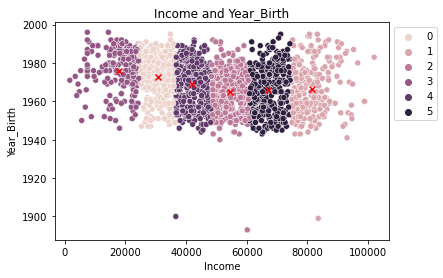

In [49]:
# compare "Income" and "Score"
sns.scatterplot(data=dfk, x='Income', y='Year_Birth', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Income and Year_Birth")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [52]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(dfk['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Year_birth Ranges\n")
for cluster_num in sorted_clusters:
    small_dfk = dfk.loc[dfk['cluster'] == cluster_num]
    min_income = small_dfk['Income'].min()
    max_income = small_dfk['Income'].max()
    avg_score = small_dfk['Year_Birth'].mean()
    avg_income = small_dfk['Income'].mean()
    
    print(f"Cluster {cluster_num}: ${int(avg_income):,}, avg Year_Birth: {int(avg_score)}")

Cluster Year_birth Ranges

Cluster 0: $30,968, avg Year_Birth: 1972
Cluster 1: $81,604, avg Year_Birth: 1966
Cluster 2: $54,424, avg Year_Birth: 1964
Cluster 3: $18,031, avg Year_Birth: 1975
Cluster 4: $42,110, avg Year_Birth: 1968
Cluster 5: $67,154, avg Year_Birth: 1966


- Born 1960s, higher income.
- Born 1970s, lower income.

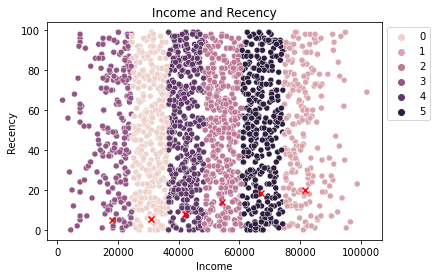

In [72]:
# compare "Income" and "Score"
sns.scatterplot(data=dfk, x='Income', y='Recency', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', marker='x')

plt.title("Income and Recency")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [73]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(dfk['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Year_birth Ranges\n")
for cluster_num in sorted_clusters:
    small_dfk = dfk.loc[dfk['cluster'] == cluster_num]
    min_income = small_dfk['Income'].min()
    max_income = small_dfk['Income'].max()
    avg_score = small_dfk['Recency'].mean()
    avg_income = small_dfk['Income'].mean()
    
    print(f"Cluster {cluster_num}: ${int(avg_income):,}, avg Recency: {int(avg_score)}")

Cluster Year_birth Ranges

Cluster 0: $30,968, avg Recency: 46
Cluster 1: $81,604, avg Recency: 50
Cluster 2: $54,424, avg Recency: 49
Cluster 3: $18,031, avg Recency: 50
Cluster 4: $42,110, avg Recency: 50
Cluster 5: $67,154, avg Recency: 48


- avg in, 46
- high in, 50
- high in, 49
- low in, 50
- high in, 50
- high in, 48

### Prediction

In [107]:
# new customer with NumPurchases = 32, Income=$75K, and Year_Birth=1965
customer = [32, 75000, 1965]

customer_group = kmeans.predict([customer])

print(f"Cluster assignment: {customer_group}")

Cluster assignment: [1]


## Conclusions

This customer is assigned to the group of shoppers that have a high income and frequently shop. Although we don't need to offer them many incentives to shop at the store, if there is a customer loyalty program then this customer could be upgraded to a higher tier so that they will continue to be a dedicated shopper.

## 3. Analyze and Predict the Results of the Marketing Campaign with Naive Bayes method.

#### The Marketing team has promoted 5 times over the last 2 years. We are going to analyze and predict which customer would be likely to participate and take advantage of the promotion from the campaign. In other words, which customers has the campaign succesfully convinced to get them make purchases. 

In [74]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [75]:
#create a dataframe with columns to use in the model
modeldf = df[['Year_Birth', 'Income', 'Kidhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]
modeldf.head()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,1957,58138.0,0,58,635,88,546,172,88,3,0,0,0,0,0,1
1,1954,46344.0,1,38,11,1,6,2,1,2,0,0,0,0,0,0
2,1965,71613.0,0,26,426,49,127,111,21,1,0,0,0,0,0,0
3,1984,26646.0,1,26,11,4,20,10,3,2,0,0,0,0,0,0
4,1981,58293.0,1,94,173,43,118,46,27,5,0,0,0,0,0,0


In [76]:
#see which features are correlated to each other
modeldf.corr()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Year_Birth,1.000000,-0.249607,0.252862,-0.009291,-0.190395,-0.040018,-0.094062,-0.066468,-0.015439,-0.075407,-0.028343,0.007324,0.061321,-0.073322,-0.016615,0.002756
Income,-0.249607,1.000000,-0.503927,0.013291,0.736642,0.527498,0.721071,0.550199,0.544005,-0.061009,0.301650,0.097104,-0.029037,0.238543,0.393570,0.121433
Kidhome,0.252862,-0.503927,1.000000,0.011930,-0.495804,-0.360137,-0.439804,-0.384763,-0.363283,0.197953,-0.146336,-0.077676,0.024423,-0.165781,-0.184012,-0.050729
Recency,-0.009291,0.013291,0.011930,1.000000,0.014442,0.019165,0.032954,-0.014962,0.010534,-0.003388,-0.030648,-0.000163,-0.052656,0.021154,-0.003225,-0.189032
MntWines,-0.190395,0.736642,-0.495804,0.014442,1.000000,0.420004,0.634142,0.425923,0.414024,0.071692,0.308074,0.181032,0.034686,0.366109,0.427599,0.198324
MntFruits,-0.040018,0.527498,-0.360137,0.019165,0.420004,1.000000,0.612707,0.578779,0.609130,-0.079902,0.112324,-0.017380,-0.017040,0.012109,0.176683,0.089382
MntMeatProducts,-0.094062,0.721071,-0.439804,0.032954,0.634142,0.612707,1.000000,0.616625,0.603253,-0.126203,0.291545,0.056416,0.005392,0.105743,0.396653,0.210389
MntFishProducts,-0.066468,0.550199,-0.384763,-0.014962,0.425923,0.578779,0.616625,1.000000,0.625115,-0.108870,0.209419,0.021371,-0.027095,0.033791,0.206927,0.103378
MntSweetProducts,-0.015439,0.544005,-0.363283,0.010534,0.414024,0.609130,0.603253,0.625115,1.000000,-0.064153,0.179455,-0.002983,-0.027895,0.014389,0.248444,0.118178
NumDealsPurchases,-0.075407,-0.061009,0.197953,-0.003388,0.071692,-0.079902,-0.126203,-0.108870,-0.064153,1.000000,-0.089033,-0.035042,-0.019615,0.037140,-0.167725,0.048927


<AxesSubplot:>

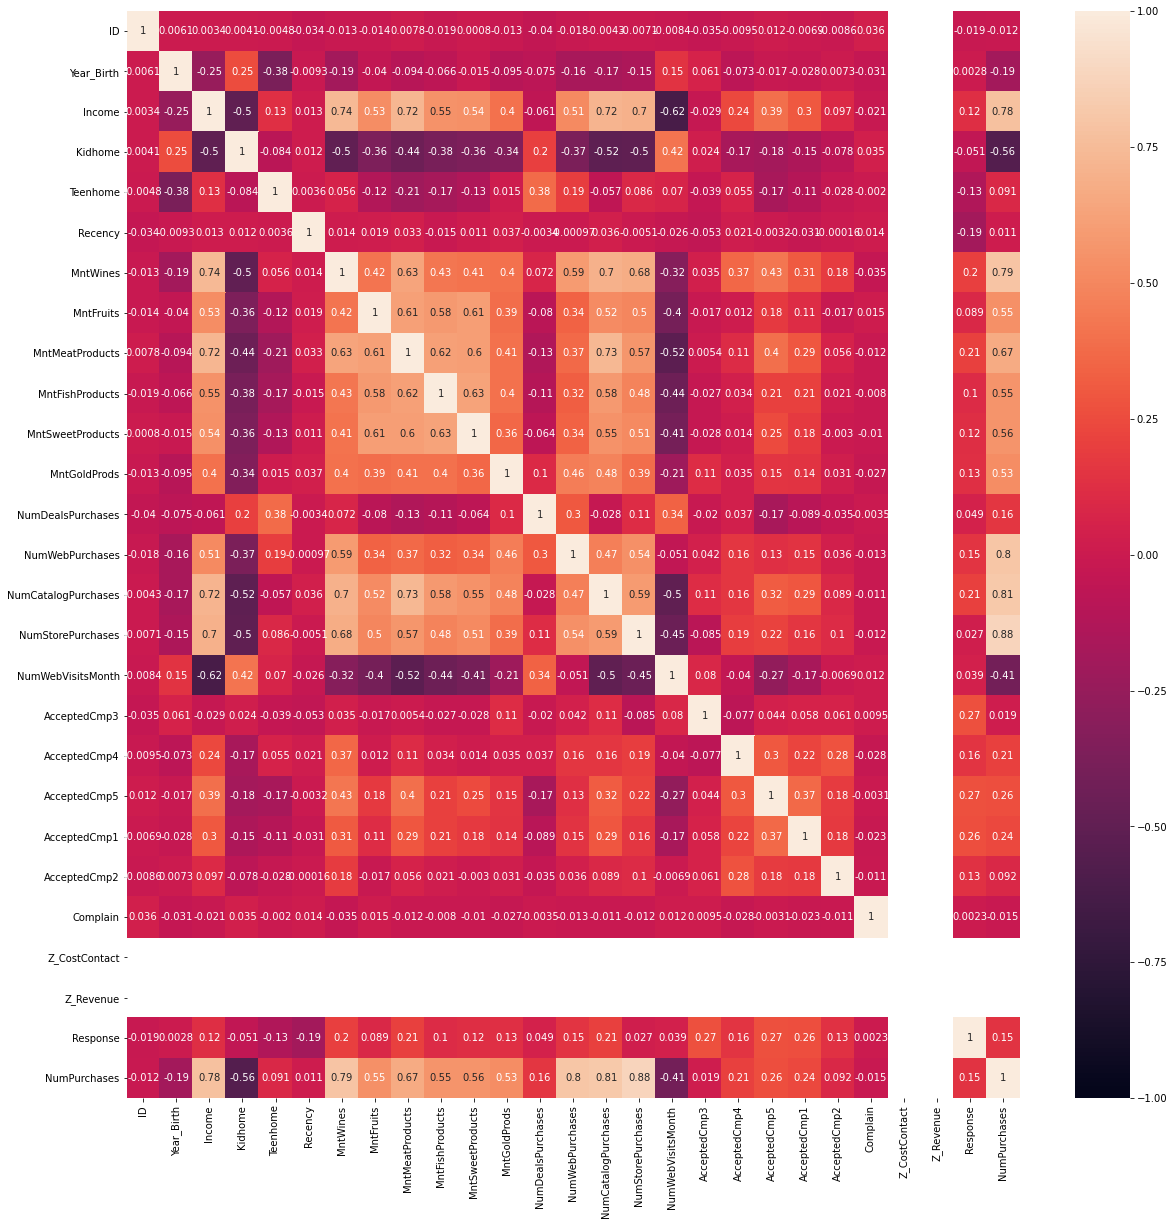

In [98]:
# show correlation of stats via heatmap
plt.figure(figsize=(20,20))

# calculate the correlation matrix for the numeric dataset 
corr = df.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

In [96]:
df['Response'].value_counts()

0    1744
1     273
Name: Response, dtype: int64

In [97]:
1744 + 273

2017

### Gaussian Naïve Bayes

In [77]:
#dataframe with predicting features
X = modeldf.drop('Response', axis=1)

#column of predictive target values
y = modeldf['Response']

In [78]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)

In [79]:
#initialize Gaussian Bayes classifier
gnb = GaussianNB()

In [80]:
#train the model to learn trends
gnb.fit(X_train, y_train)

GaussianNB()

In [81]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

0.7982804232804233

In [82]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [94]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=["Predicted don't response", 'Predicted responsed'],
    index=["True don't responses", 'True responsed']
)

cm

,Predicted don't response,Predicted responsed
True don't responses,371,75
True responsed,37,22


In [84]:
#frequency of passed students to failed students in the test dataset
y_test.value_counts()

0    446
1     59
Name: Response, dtype: int64

In [85]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.7782178217821782

In [86]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       446
           1       0.23      0.37      0.28        59

    accuracy                           0.78       505
   macro avg       0.57      0.60      0.58       505
weighted avg       0.83      0.78      0.80       505



### Bernoulli's Naïve Bayes

Bernoull's Naïve Bayes classifier is best on a target variable that is binary (Boolean; True/False (1,0) values). Let's try this method on the dataset from the previous example.

In [87]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [88]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [89]:
#build the model with training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [90]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

0.8657407407407407

In [91]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [92]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Failed Responses', 'Predicted Passed Responses'],
    index=['True Failed Responses', 'True Passed Responses']
)
cm

,Predicted Failed Responses,Predicted Passed Responses
True Failed Responses,371,75
True Passed Responses,37,22


In [93]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.7782178217821782

Overall, the model is really good at finding students that passed but in this test dataset, it didn't have enough data points to find the trend of predicting features for students that failed the test. One way to improve the results would be to decrease the size of the training data so that data points for failing students seem more significant. This dataset is also small, so new data with more students that failed could help the model see the trends for failing students. Lastly, it could just be that Naïve Bayes isn't the best model to use for the data and we should compare its results to other predictive classification models.